<a href="https://colab.research.google.com/github/Herdvair/Prediksi-Harga-Rumah-Menggunakan-Pemodelan-Regresi/blob/main/Prediksi_Harga_Rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('boston.csv')


# Data Understanding & Data Cleaning

In [ ]:
# cek data secara keseluruhan
def data_understanding(df : object) -> object:
    print('\n ===== Shape =====')
    print(df.shape)

    print('\n ===== Info =====')
    df.info()

    print('\n ===== Describe =====')
    print(df.describe())

    print('\n ===== Distribusi Kelas y =====')
    print(df['medv'].value_counts())

    print('\n ===== Missing Value =====')
    print(df.isna().sum())

    print('\n ===== Duplicated Value =====')
    print(len(df.drop_duplicates())/len(df))


data_understanding(df)


 ===== Shape =====
(506, 14)

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

 ===== Describe =====
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
m

**Dataset Overview**
- Dimensi data : Dataset "Boston.csv" memiliki 506 baris dan 14 kolom
- Kolom : kolom yang termasuk dalam fitur adalah crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat. Selain itu, kolom yang termasuk dalam target adalah medv.
- Tipe data : Secara keseluruhan hanya tipe data numerik, yaitu int dan float
- Data duplikat : Tidak ada data duplikat
- Data hilang : Tidak ada data hilang

In [ ]:
def check_plot(df):

    for i in df.columns:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

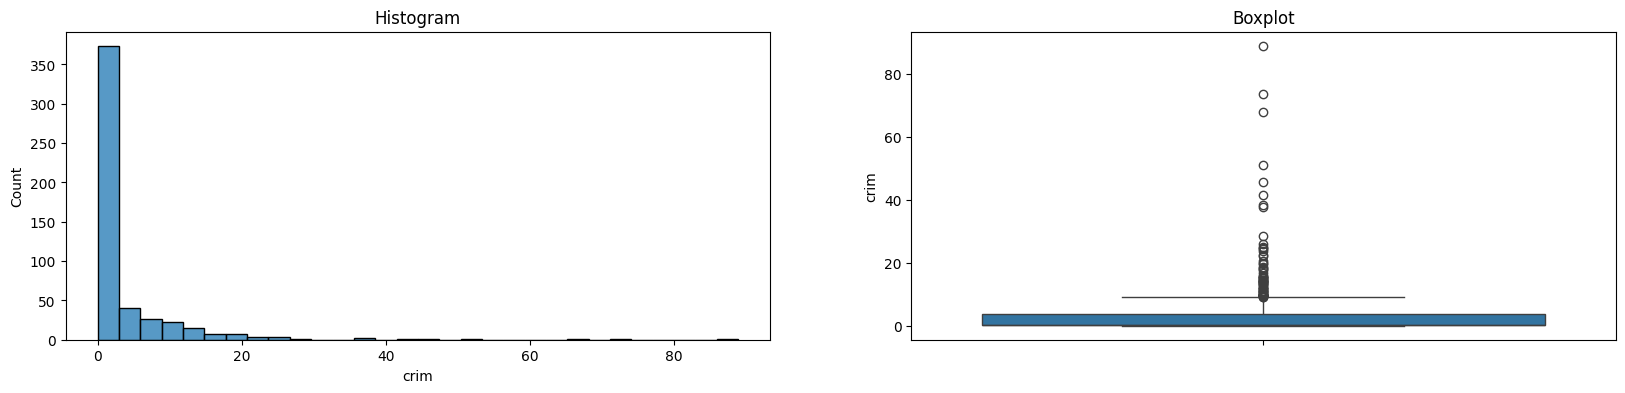

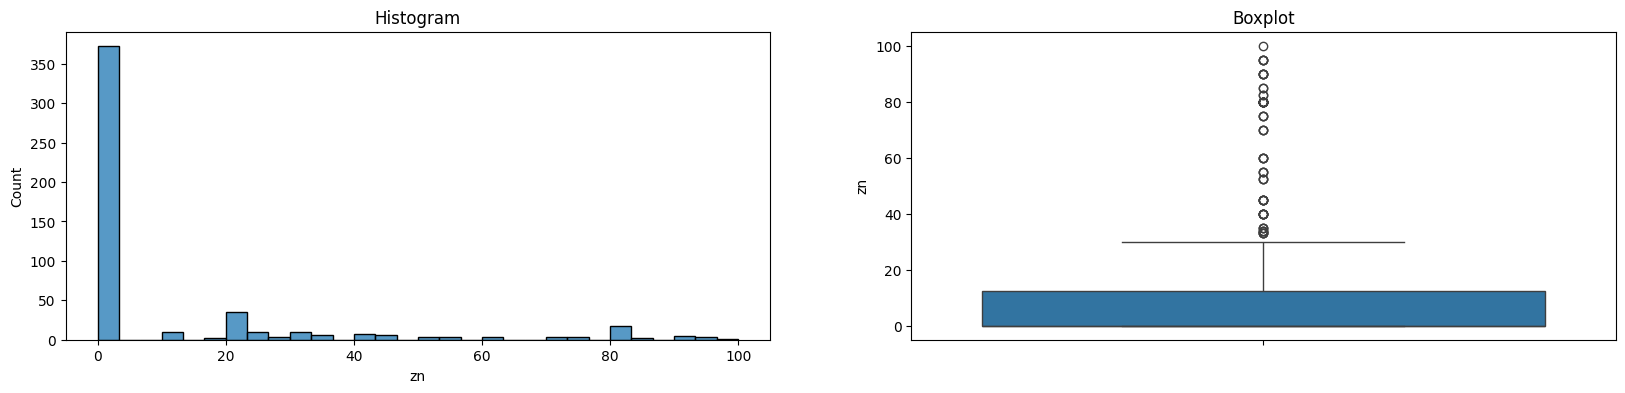

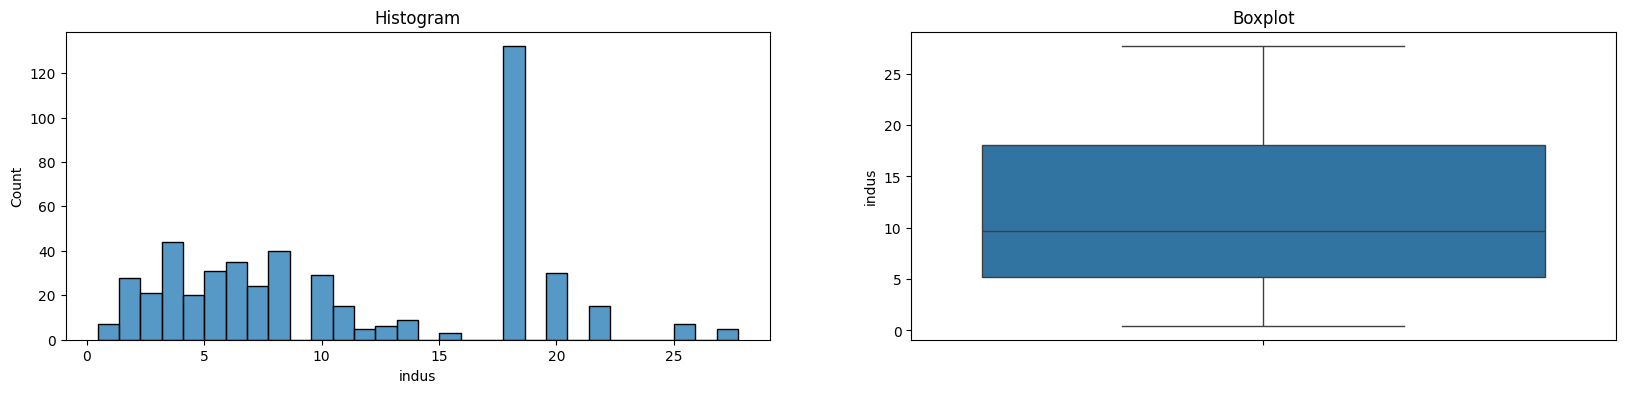

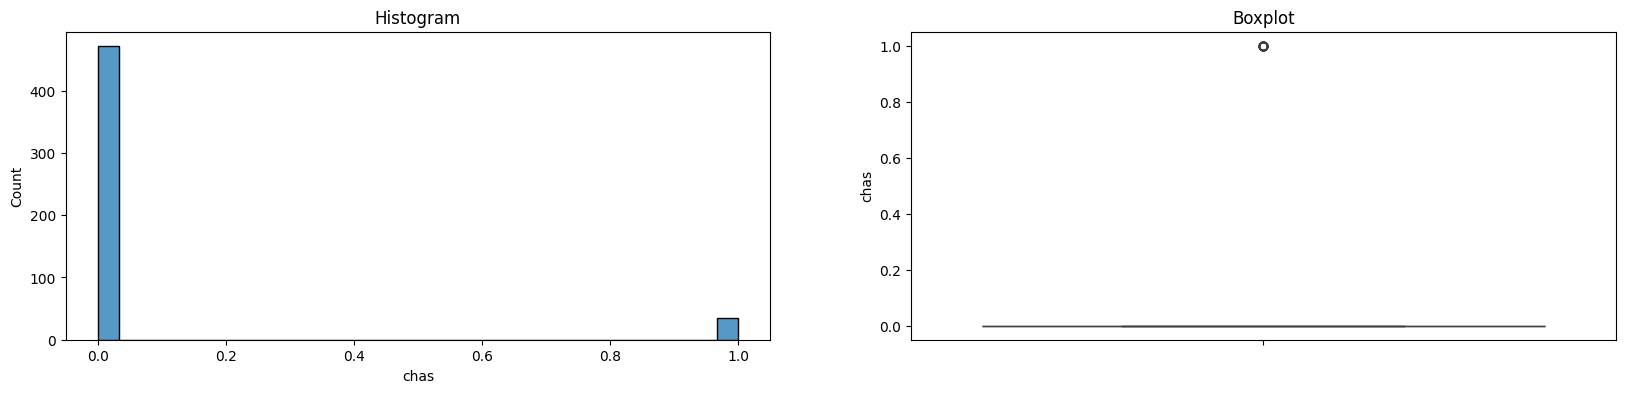

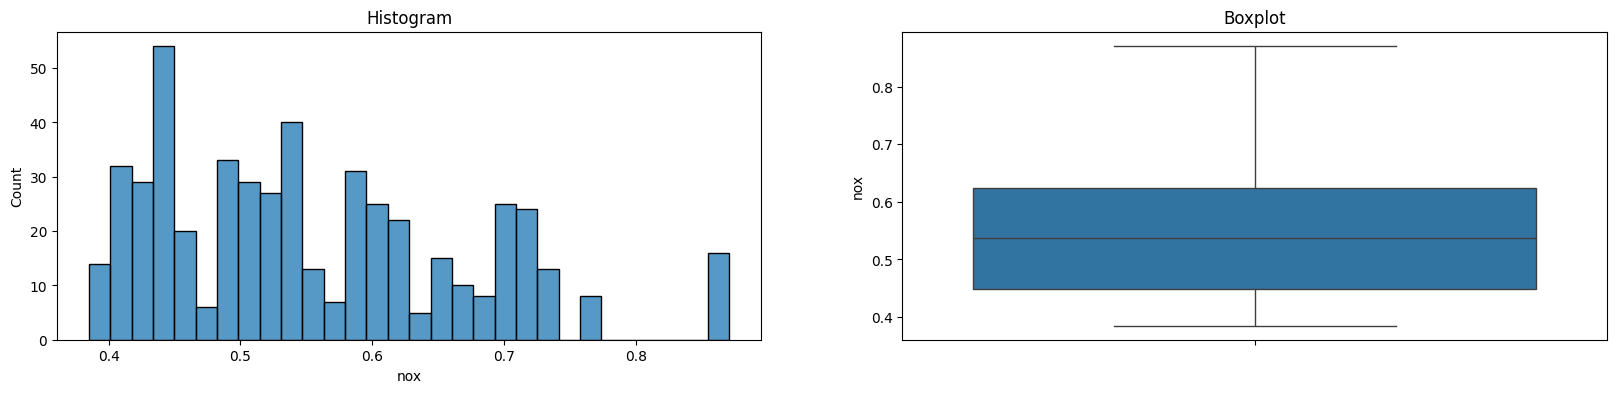

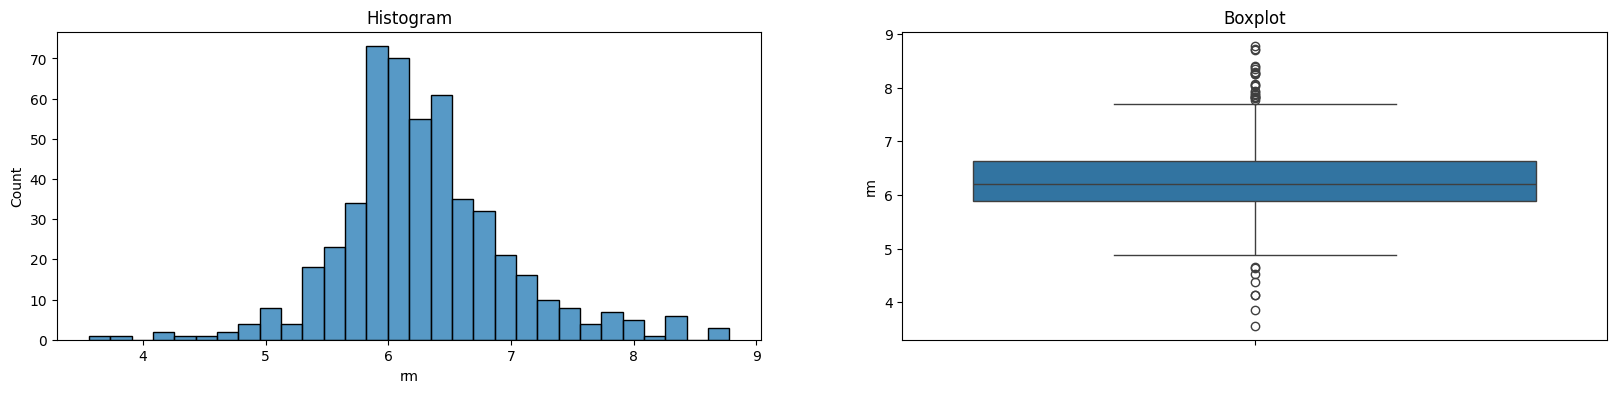

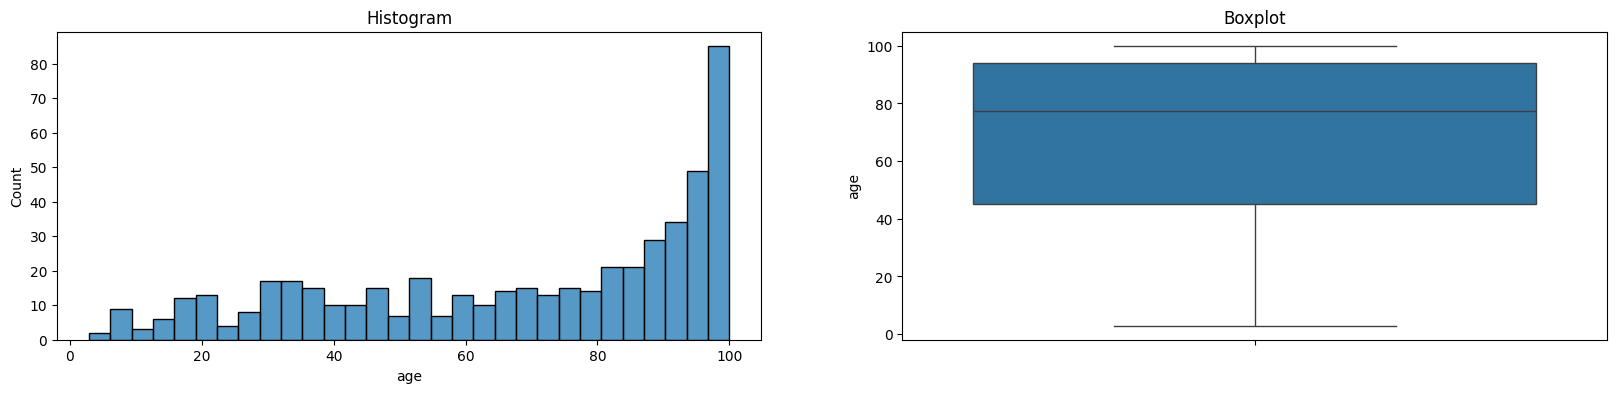

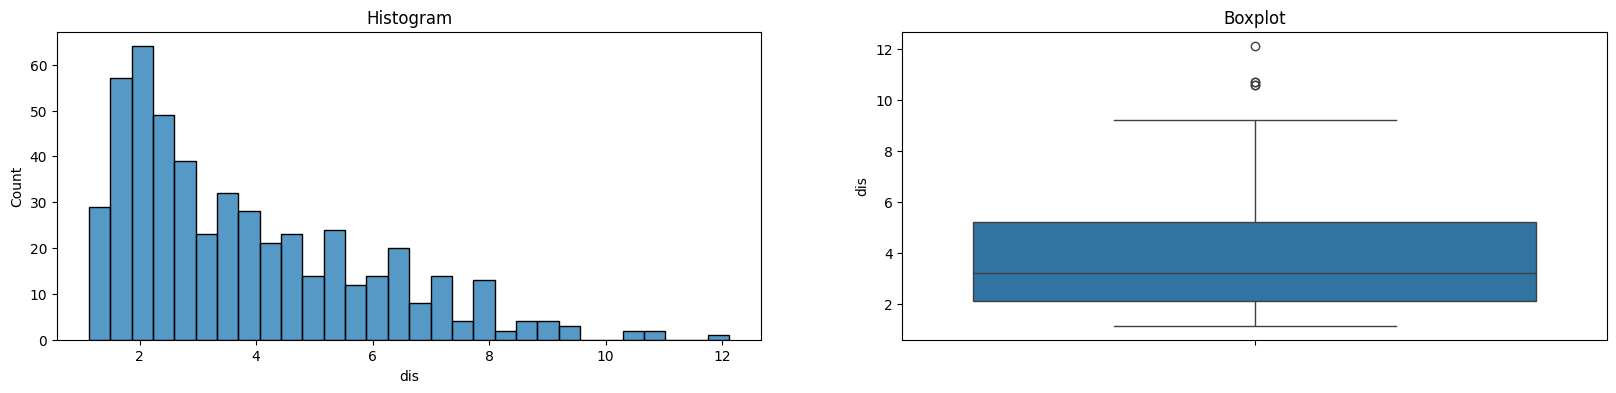

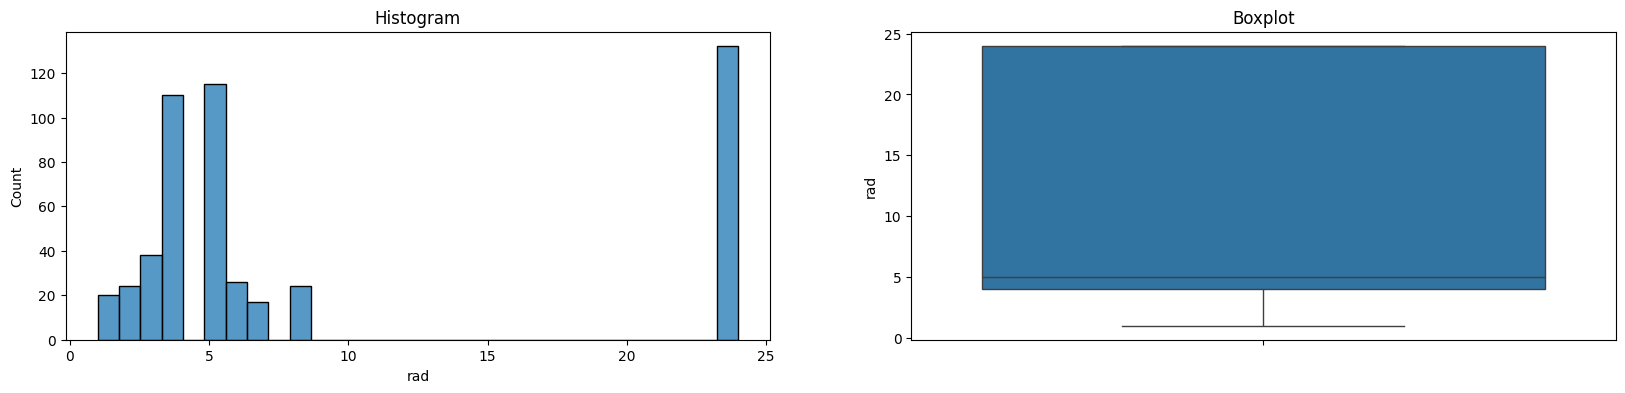

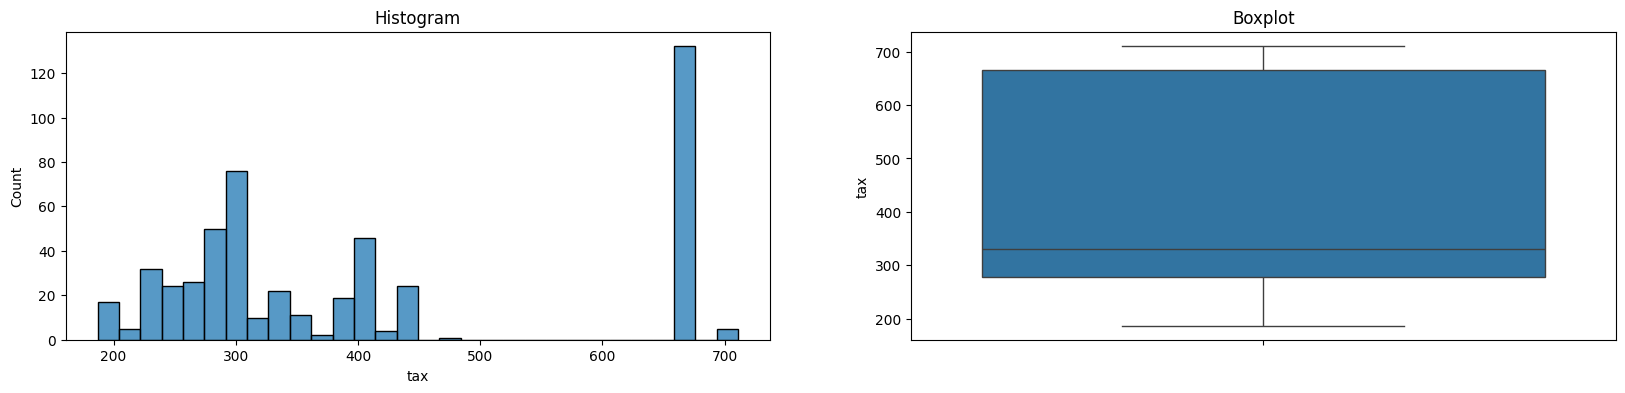

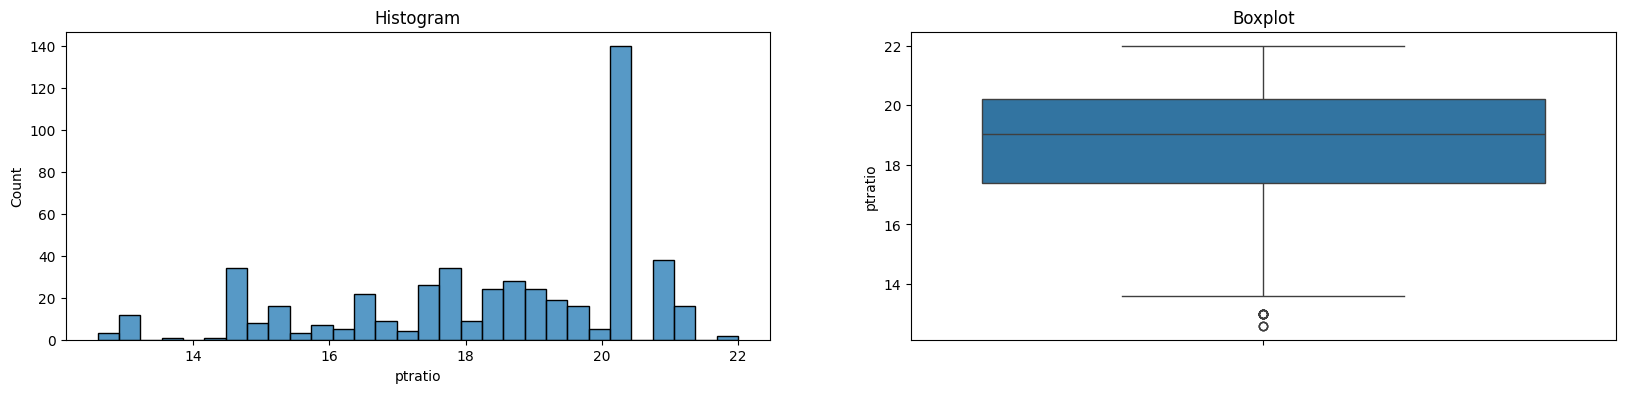

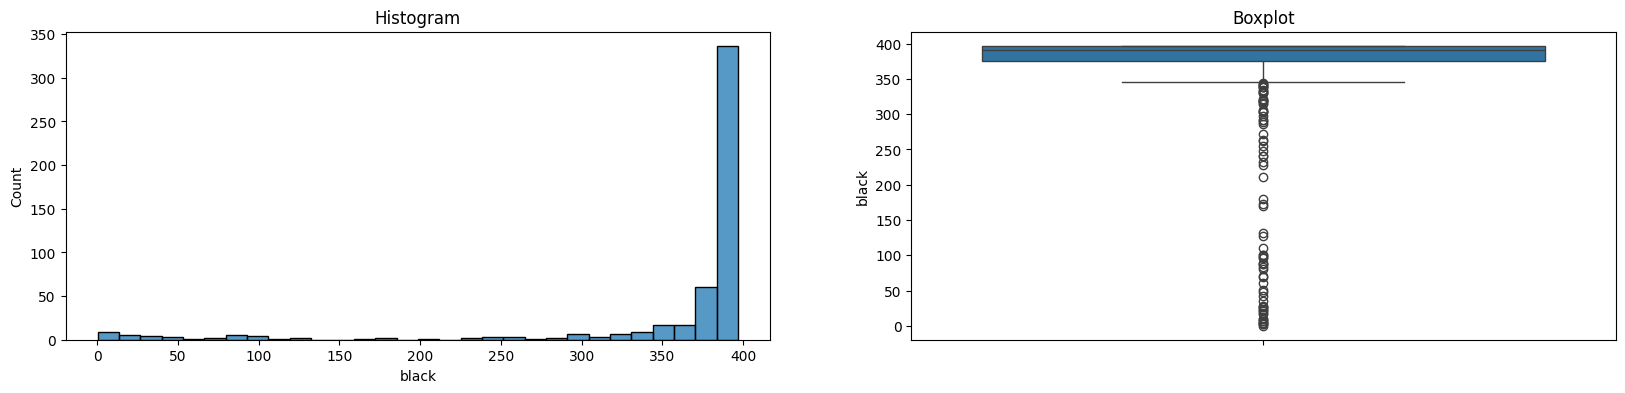

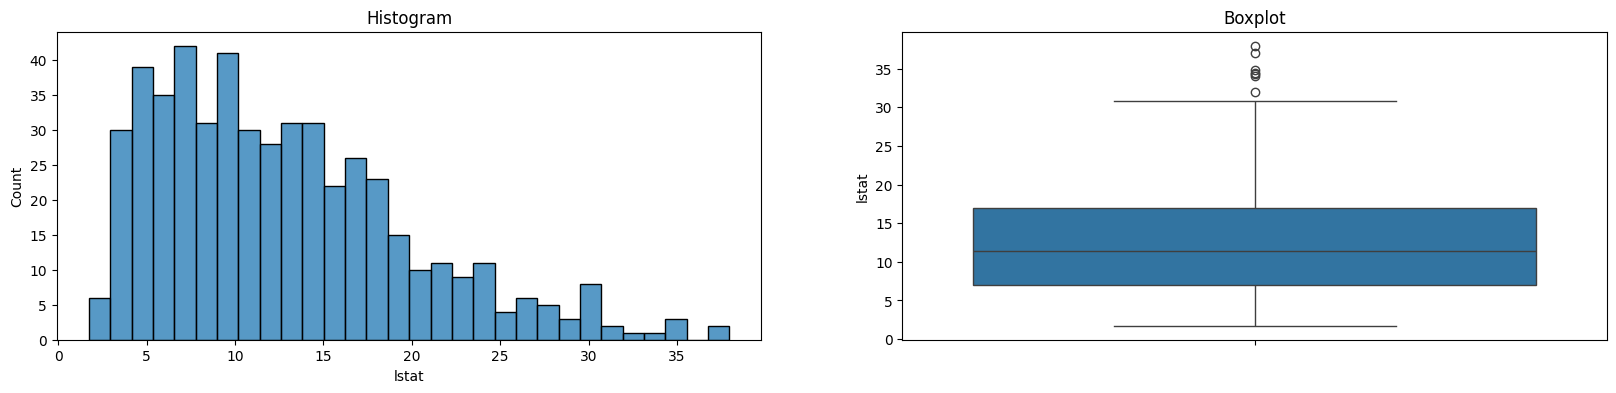

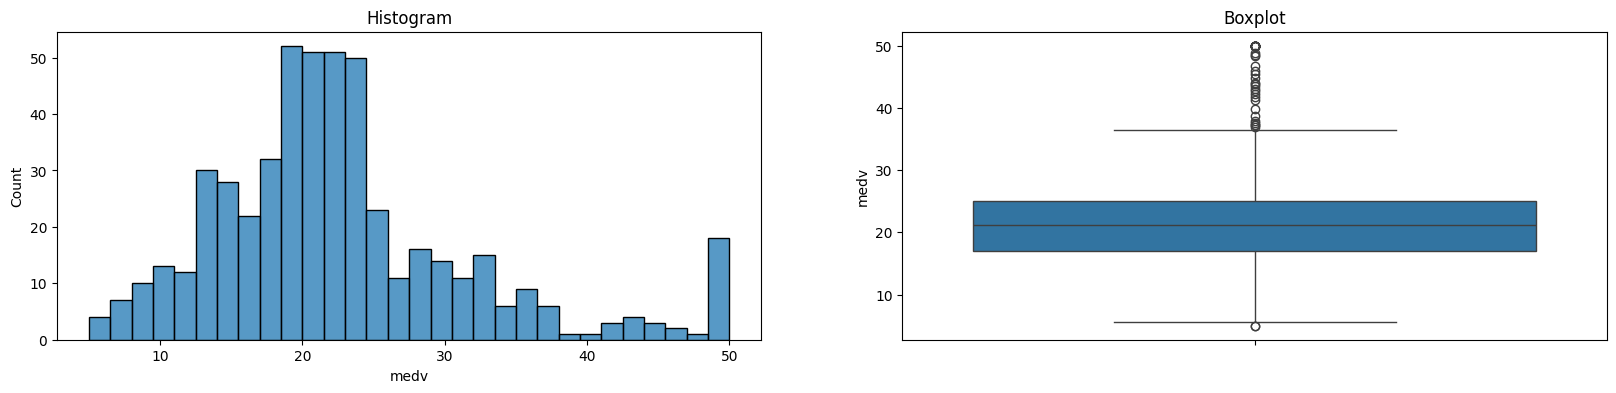

In [ ]:
check_plot(df)

Note : Tidak perlu handling outlier

# Identifikasi Variabel Untuk Prediksi Harga Rumah

Variabel Independen : crim, zn, indus, nox, rm, age, dis, rad, ptratio, lstat

Variabel Dependen : medv (harga rumah)

Saya ingin melihat beberapa indikator dalam prediksi harga rumah baik dari segi lingkungan, fisik rumah, sosial-ekonomi hingga aksesibilitas. seperti pengaruh tingkat kriminalitas, rasio guru dan murid untuk melihat tingkat pendidikan di lingkungan tersebut, (area perumahan dekat dengan sungai dapat menambah kesan keindahan dan kenyamanan hunian), pengaruh populasi status soial ekonomi yang rendah, jarak ke pusat bisnis/kerjaan di Boston, akses ke jalan raya utama. pengaruh dari fisik rumah biasanya dari usia rumah tersebut, atau pengaruh dari lingkungan seperti tingkat kebersihan udara atau lingkungan sekitar perumahan. Faktor-faktor itulah yang biasanya memengaruhi harga rumah keempat indikator dalam memperkirakan harga rumah.

In [ ]:
#split training, validatiom, dan testing
feature = df.drop(columns='medv')
target = df[['medv']]

feature_house_pretrain, feature_house_test, target_house_pretrain, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_house_train, feature_house_validation, target_house_train, target_house_validation = train_test_split(feature_house_pretrain, target_house_pretrain, test_size=0.20, random_state=42)

# Analisis Korelasi dan Seleksi Fitur

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


Terdapat beberapa fitur yang memiliki VIF Score tinggi, yaitu : indus, nox, dis, rad, tax.

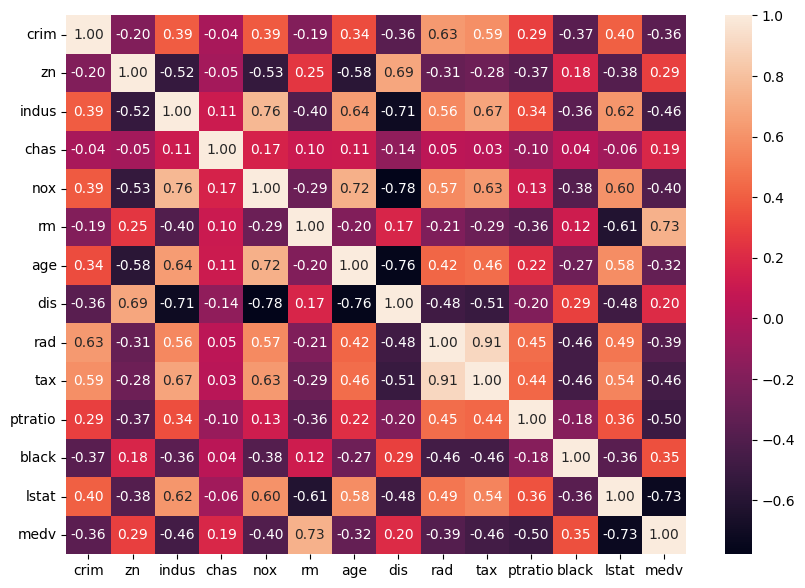

In [ ]:
house_train = pd.concat([feature_house_train, target_house_train], axis=1)
corr = house_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Pedoman Umum Interpretasi Nilai VIF** (sumber : [Medium](https://medium.com/@ajayverma23/understanding-vif-what-it-is-and-why-its-needed-c24125b5c73f))

VIF = 1 : Tidak ada korelasi antara variabel prediktor dan variabel lainnya.

1 < VIF < 5 : Korelasi sedang; umumnya dapat diterima.

VIF ≥ 5 : Menunjukkan multikolinearitas yang berpotensi bermasalah.

VIF ≥ 10 : Menunjukkan multikolinearitas serius yang mungkin memerlukan penyelidikan lebih lanjut.

------------

In [ ]:
feature_house_train = feature_house_train.drop(columns=['tax', 'chas', 'black'])
feature_house_validation = feature_house_validation.drop(columns=['tax', 'chas', 'black'])
feature_house_test = feature_house_test.drop(columns=['tax', 'chas', 'black'])

Note : Saya melakukan drop keempat kolom, selain melihat dari VIF. Saya mempertimbangkan variabel yang kurang releven dalam prediksi harga rumah.

In [ ]:
#re-check VIF
X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.726921
2,zn,2.279518
3,indus,3.202004
4,nox,4.432419
5,rm,1.936750
6,age,3.110432
7,dis,4.382005
8,rad,2.678393
9,ptratio,1.824012
10,lstat,2.911733


# Pelatihan Model

## Regresi Ridge

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_house_train, y_house_train)
ridge_reg_pointone.fit(X_house_train, y_house_train)
ridge_reg_one.fit(X_house_train, y_house_train)
ridge_reg_ten.fit(X_house_train, y_house_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_house_validation = feature_house_validation.to_numpy()
y_house_validation = target_house_validation.to_numpy()
y_house_validation = y_house_validation.reshape(len(y_house_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_house_validation)
    rmse = np.sqrt(mean_squared_error(y_house_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.9871729496533925
RMSE of Ridge regression model with alpha = 0.1 is 4.97721686874111
RMSE of Ridge regression model with alpha = 1.0 is 4.949270772919328
RMSE of Ridge regression model with alpha = 10 is 4.923636859209917


lambda 10 yang terbaik

In [ ]:
#koefisien
ridge_best = ridge_reg_ten

coefridge_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coefridge_df

,feature,coefficient
0,intercept,23.096463
1,crim,-0.121051
2,zn,0.029287
3,indus,-0.107356
4,nox,-1.878376
5,rm,4.520110
6,age,-0.005474
7,dis,-1.229545
8,rad,0.009149
9,ptratio,-0.776984


Insight :

- fitur yang memiliki **pengaruh dalam menaikkan harga rumah** adalah rm, zn, dan rad. Diantara ketiga fitur ini, fitur rm memiliki nilai koefisien yang lebih tinggi yaitu 4.520110. Artinya, rm (jumlah rata-rata kamar) memiliki pengaruh kenaikan harga rumah. Misal setiap tambahan kamar maka harga rumah naik sekitar 4.520. Selain itu, zn (proporsi lahan perumahan kavling) menujukkan semakin besar kavling yang diperoleh maka harga rumah akan naik sekitar 0.029 dan rad (indeks akses ke jalan raya) menujukkan pengaruh dalam kenaikan harga rumah meskipun sangat kecil kontribusinya.

- fitur yang memiliki **pengaruh dalam menurunkan harga rumah** adalah crim, indus, nox, age, dis, ptratio, lstat. Diantara 7 fitur ini yang paling memengaruhi penurunan harga rumah adalah nox (tingkat polusi udara), nyatanya orang mencari rumah dengan bebas polusi udara atau minim polusi udara. Oleh karena itu, jika semakin tinggi polusi udara pada sekitar perumahan tersebut maka otomatis mengalami penurunan harga rumah yaitu sekitar (-1.878). keenam fitur lainnya juga memiliki peranan masing-masing dalam memengaruhi penurunan harga rumah.

### Diagnostic Study



In [ ]:
y_predict_train = ridge_best.predict(X_house_train)

print('R-squared for training data is {}'.format(r2_score(y_house_train, y_predict_train)))

R-squared for training data is 0.7283466106587193


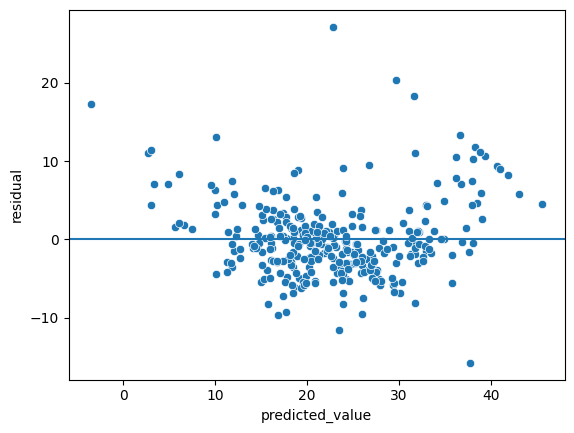

In [ ]:
# calculate residuals
residual = y_house_train - y_predict_train

# prepare dataframe
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

  1. Linear Relationship : OK
  2. Variance : NO. Karena variasinya membentuk kurva, bukan konstan
  3. Independen residual : Belum bisa dipastikan terpenuhi atau tidak. Namun, beberapa titik cukup tersebar meskipun ditengahnya ada berdempetan satu sama lain yang menunjukkan adanya keterikatan.

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define the model
# 4 models with 4 different alphas (lambda)
Lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
Lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
Lasso_reg_one = Lasso(alpha=1, random_state=42)
Lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
Lasso_reg_pointzeroone.fit(X_house_train, y_house_train)
Lasso_reg_pointone.fit(X_house_train, y_house_train)
Lasso_reg_one.fit(X_house_train, y_house_train)
Lasso_reg_ten.fit(X_house_train, y_house_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_house_validation = feature_house_validation.to_numpy()
y_house_validation = target_house_validation.to_numpy()
y_house_validation = y_house_validation.reshape(len(y_house_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [Lasso_reg_pointzeroone,
          Lasso_reg_pointone,
          Lasso_reg_one,
          Lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_house_validation)
    rmse = np.sqrt(mean_squared_error(y_house_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.966822928296355
RMSE of Lasso regression model with alpha = 0.1 is 4.950598541588288
RMSE of Lasso regression model with alpha = 1.0 is 4.880024482360668
RMSE of Lasso regression model with alpha = 10 is 5.422650603474273


lambda 1.0 terbaik

In [ ]:
lasso_best = Lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,32.794207
1,crim,-0.086244
2,zn,0.019723
3,indus,-0.060089
4,nox,-0.000000
5,rm,2.202580
6,age,0.026044
7,dis,-0.537924
8,rad,0.000000
9,ptratio,-0.730300


- fitur yang memiliki **pengaruh dalam menaikkan harga rumah** adalah rm, dan zn. Diantara ketiga fitur ini, fitur rm memiliki nilai koefisien yang lebih tinggi yaitu 4.520110. Artinya, rm (jumlah rata-rata kamar) memiliki pengaruh kenaikan harga rumah. Misal setiap tambahan kamar maka harga rumah naik sekitar 2.2025. Selain itu, zn (proporsi lahan perumahan kavling) menujukkan semakin besar kavling yang diperoleh maka harga rumah akan naik sekitar 0.0197 dan rad (indeks akses ke jalan raya) menujukkan pengaruh dalam kenaikan harga rumah meskipun tidak signifikan.

- fitur yang memiliki **pengaruh dalam menurunkan harga rumah** adalah crim, indus, age, dis, ptratio, lstat.

- fitur yang dinilai tidak relevan dan dibuang karena tidak memberikan kontribusi pada kenaikan harga rumah yaitu nox (tingkat polusi udara), nyatanya orang mencari rumah dengan bebas polusi udara atau minim polusi udara. Oleh karena itu, model membuang fitur ini karena tidak memberikan pengaruh terhadap kenaikan harga rumah, hal ini juga sama dengan rad (indeks akses ke jalan raya) fiturnya di buang pada pemodelan regresi lasso karena tidak berkontribusi pada kenaikan harga rumah.

###Diagnostic study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_house_train)

print('R-squared for training data is {}'.format(r2_score(y_house_train, y_predict_train)))

R-squared for training data is 0.6899118029680206


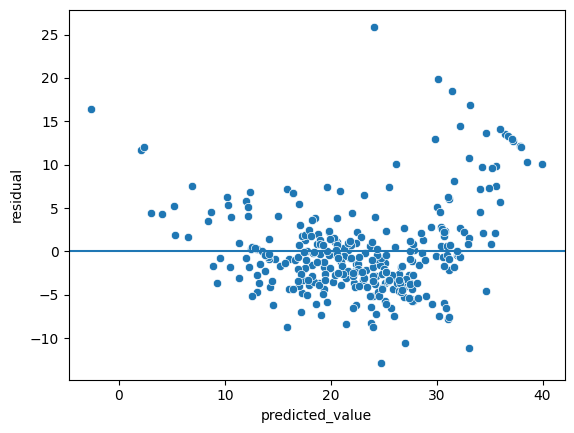

In [ ]:
# calculate residuals
residual = y_house_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

1. Linear Relationship : OK
2. Variance : NO. Karena variasinya membentuk kurva, bukan konstan
3. Independen residual : Belum bisa dipastikan terpenuhi atau tidak. Sama dengan kasus ridge, beberapa titik cukup tersebar meskipun ditengahnya predicted_value rentang (20-25) ada pola berdempetan satu sama lain yang menunjukkan adanya keterikatan.

## Visualisasi Koefisien

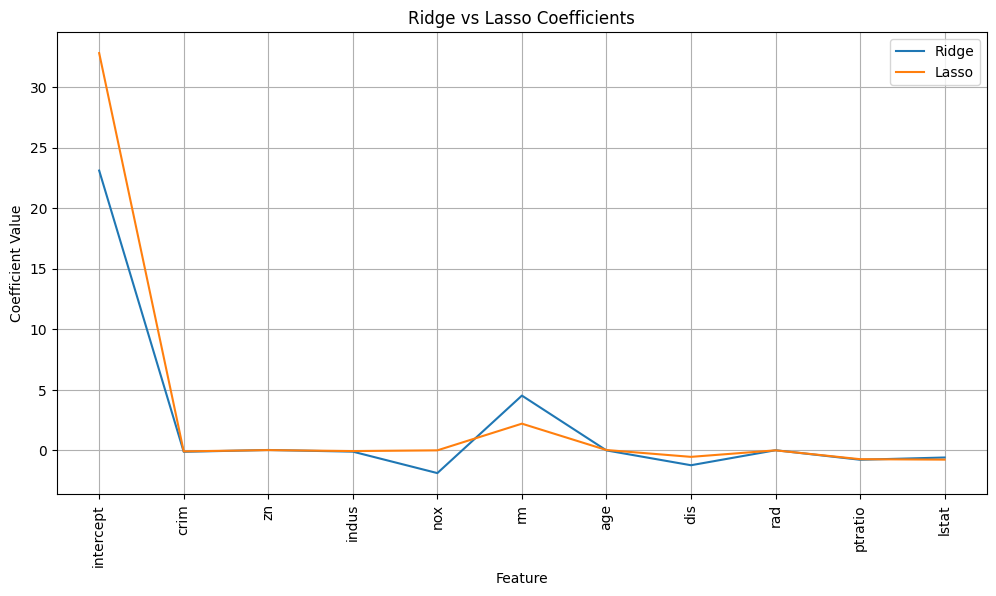

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(coefridge_df['coefficient'], label='Ridge')
plt.plot(coef_df['coefficient'], label='Lasso')

# Set x-axis labels to feature names
plt.xticks(ticks=range(len(coef_df)), labels=coef_df['feature'], rotation=90)

plt.legend()
plt.title("Ridge vs Lasso Coefficients")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

# Evaluasi Model

## Regresi Ridge

### Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_house_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_house_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_house_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_house_train, y_predict_train)))

RMSE for training data is 4.967278386849998
MAE for training data is 3.564804080307542
MAPE for training data is 0.18223506084408903


Hasil evaluasi model regresi ridge pada data training menunjukkan :
- RMSE menunjukkan rata-rata kesalahan prediksi model sekitar 4.967 terhadap harga rumah aktual
- MAE menunjukkan rata-rata absolut selisih antara hasil prediksi dengan data aktual sekitar 3.564
- MAPE menunjukkan prediksi model memiliki rata-rata kesalahan relatif sekitar 0.18 atau 18%. Artinya ridge mampu menangkap pola hubungan antar variabel dengan cukup baik pada data training.

### Testing Error

In [ ]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = ridge_best.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_house_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_house_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_house_test, y_predict_test)))

RMSE for testing data is 5.049388141419087
MAE for testing data is 3.249922815520962
MAPE for testing data is 0.17774125091884616


Hasil evaluasi model regresi ridge pada data testing menunjukkan :

- RMSE menunjukkan rata-rata kesalahan prediksi model sekitar 5.049 terhadap harga rumah aktual
- MAE menunjukkan rata-rata absolut selisih antara hasil prediksi dengan data aktual sekitar 3.249
- MAPE menunjukkan prediksi model memiliki rata-rata kesalahan relatif sekitar 0.17 atau 17%. Artinya ridge mampu dalam memprediksi harga rumah dengan cukup baik pada berdasarkan hasil pengolahan data training. Sehingga dapat disimpulkan bahwa model ini mampu menghindari overfitting dan memiliki kemampuan generalisasi yang cukup baik dalam prediksi harga rumah.

### Lasso

#### Training Error

In [ ]:
y_predict_train = lasso_best.predict(X_house_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_house_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_house_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_house_train, y_predict_train)))

RMSE for training data is 5.307054582148079
MAE for training data is 3.838112830577344
MAPE for training data is 0.18552640097898557


Hasil evaluasi model regresi lasso pada data training menunjukkan :

- RMSE menunjukkan rata-rata kesalahan prediksi model sekitar 5.3070 terhadap harga rumah aktual
- MAE menunjukkan rata-rata absolut selisih antara hasil prediksi dengan data aktual sekitar 3.838
- MAPE menunjukkan prediksi model memiliki rata-rata kesalahan relatif sekitar 0.18 atau 18%. Artinya lasso mampu menangkap pola hubungan antar variabel dengan cukup baik pada data training.

#### Testing Error

In [ ]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = lasso_best.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_house_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_house_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_house_test, y_predict_test)))

RMSE for testing data is 5.026642200216289
MAE for testing data is 3.3691612142282605
MAPE for testing data is 0.17721267768567958


- RMSE menunjukkan rata-rata kesalahan prediksi model sekitar 5.026 terhadap harga rumah aktual
- MAE menunjukkan rata-rata absolut selisih antara hasil prediksi dengan data aktual sekitar 3.369
- MAPE menunjukkan prediksi model memiliki rata-rata kesalahan relatif sekitar 0.17 atau 17%. Artinya lasso mampu dalam memprediksi harga rumah dengan cukup baik pada berdasarkan hasil pengolahan data training. Sehingga dapat disimpulkan bahwa model ini mampu menghindari overfitting dan memiliki kemampuan generalisasi yang cukup baik dalam prediksi harga rumah.

**PERBANDINGAN LASSO DAN RIDGE**

Berdasarkan hasil evaluasi, regresi ridge menunjukkan performa lebih baik pada data training dibandingkan regressi lasso. Dapat dilihat hasil RMSE pada data training ridge lebih kecil dibandingkan lasso, kemungkinan lasso melakukan seleksi fitur jadi berpengaruh dalam akurasi hasil model training. Namun pada data testing, keduanya menujukan hasil yang hampir sama baik dari segi RMSE, MAE dan MAPE. Artinya, kedua model ini memiliki generalisasi yang baik meskipun ridge lebih stabil karena semua fitur dipertahankan dan lasso lebih strict dalam pemilihan fitur karena lasso dapat membuang fitur yang  dinilai tidak relevan pada harga rumah.